In [48]:
%pylab inline
import numpy as np
import os
from os import listdir
from os.path import isfile, join

run_stats_dir = os.getcwd()+"/run_stats/"
onlyfiles = [f for f in listdir(run_stats_dir) if isfile(join(run_stats_dir, f))]

run_stats = []
for f in onlyfiles:
    run_stat = np.load(run_stats_dir+f, mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')
    run_stats.append(run_stat)
    
run_stats_mean = np.mean(run_stats, axis=0)
run_stats_std = np.std(run_stats, axis=0)



Populating the interactive namespace from numpy and matplotlib


C:\Users\user\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


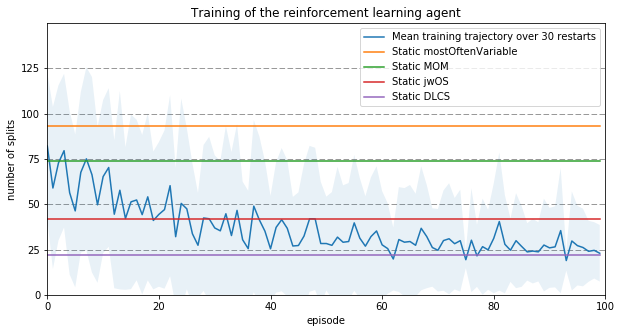

In [49]:
from matplotlib.backends.backend_pdf import PdfPages

static_heuristic = {'mostOftenVariable': 93, 'MOM': 74, 'jwOS': 42, 'DLCS': 22}

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
plt.plot(np.arange(len(run_stats[0])), run_stats_mean, label ="Mean training trajectory over {} restarts".format(len(run_stats)))
ax.fill_between(np.arange(len(run_stats[0])), 
                run_stats_mean - run_stats_std,  
                run_stats_mean + run_stats_std, 
                alpha=0.1)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
for key in static_heuristic:
    plt.plot(np.arange(len(run_stats[0])), np.ones(len(run_stats[0]))*static_heuristic[key], label = "Static "+key)
plt.xlabel("episode")
plt.ylabel("number of splits")
plt.legend(loc="best")
plt.title("Training of the reinforcement learning agent")
plt.xlim(0,100)
plt.ylim(0,150)
plt.yticks(np.arange(0, 150, 25))
plt.show()

pp = PdfPages('training_plot.pdf')
pp.savefig(fig)
pp.close()

In [10]:
state_dir = os.getcwd()+"/state_var/"
onlyfiles = [f for f in listdir(state_dir) if isfile(join(state_dir, f))]


for f in onlyfiles:
    states = np.load(state_dir+f, mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

print(states[0])
print(np.mean(states, axis = 0))    
print(np.std(states, axis = 0))



[ 2.          3.          3.          3.          3.          3.
  4.38202663  2.          2.          2.          2.          3.          4.        ]
[ 2.          2.15699717  2.68499315  2.95075223  2.98378861  2.9954708
  3.89030592  1.01649482  1.27354904  1.87187784  1.97794945  2.16350108
  3.17309942]
[ 0.          0.35758062  0.45518152  0.21551133  0.11985393  0.06714678
  0.36878628  0.12736853  0.43266206  0.33182422  0.14389634  0.36188379
  0.48819656]


In [19]:
from sklearn.preprocessing import PolynomialFeatures


X = np.arange(30).reshape(3,10)
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   4.00000000e+00,
          5.00000000e+00,   6.00000000e+00,   7.00000000e+00,
          8.00000000e+00,   9.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   6.00000000e+00,
          7.00000000e+00,   8.00000000e+00,   9.00000000e+00,
          4.00000000e+00,   6.00000000e+00,   8.00000000e+00,
          1.00000000e+01,   1.20000000e+01,   1.40000000e+01,
          1.60000000e+01,   1.80000000e+01,   9.00000000e+00,
          1.20000000e+01,   1.50000000e+01,   1.80000000e+01,
          2.10000000e+01,   2.40000000e+01,   2.70000000e+01,
          1.60000000e+01,   2.00000000e+01,   2.40000000e+01,
        

In [29]:
a = np.arange(10).reshape(5,2)
a[0:1,:] == 2

array([[False, False]], dtype=bool)